<h1>Esercitazioni</h1>
<h2>Anagrafica</h2>

Esercitazione circa l'utilizzo di Dataframe, Serie e le librerie pandas e numpy per l'utilizzo di una sintassi corretta. 

In [102]:
%matplotlib inline

import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(5.0, 2.0))

with open('/home/pippozord/Scrivania/Statistica/2023/superhero-datascience/content/data/Anagrafica.csv', 'r') as heroes_file:
  anagrafica_reader = csv.reader(heroes_file, delimiter=' ', quotechar='"')
  anagrafica = list(anagrafica_reader)[1:]


<h4>Serie</h4>
Creo una serie in cui associo il peso al mio giocatore.

In [103]:
weight = [int(a[2]) if a[2] else None for a in anagrafica]
names = [n[0] for n in anagrafica]
series_weight = pd.Series(weight, index = names)
series_weight.head()

Giocatore1     76
Giocatore2     75
Giocatore3     70
Giocatore4     72
Giocatore5    130
dtype: int64

<h5>Operazioni</h5>

Estraggo da `series_weight` solo i giocatori con peso compreso tra 80 e 83 inclusi.

Da notare la sintassi. uso l'operatore d'accesso `[]` dentro cui inserisco `[query]`. 

Risultato `serie[[query]]`.

Operazione di *list comprehension*

In [104]:
series_weight[[80 < y < 84 for y in series_weight]]

Giocatore14     83
Giocatore43     83
Giocatore51     83
Giocatore64     81
Giocatore104    82
Giocatore118    82
Giocatore169    82
Giocatore173    81
Giocatore264    82
Giocatore293    82
Giocatore327    83
Giocatore335    82
Giocatore340    81
Giocatore345    82
Giocatore354    83
Giocatore385    83
Giocatore391    83
Giocatore392    82
dtype: int64

Eseguo una query ma questa volta senza *list comprehension*. Tutti i giocatori con peso = 80. Se voglio fare una query per il giocatore con peso comrpeso tra 2 valori devo utilizzare la *list comprehension* descritta sopra.

In [105]:
series_weight[series_weight == 80].head(5)

Giocatore8     80
Giocatore17    80
Giocatore22    80
Giocatore30    80
Giocatore44    80
dtype: int64

Utilizzo `value.count()` per contare le frequenze assolute dei miei valori peso.

In [106]:
series_weight.value_counts()

70     43
80     28
85     23
75     21
60     19
       ..
55      1
77      1
47      1
105     1
98      1
Length: 67, dtype: int64

Aggiungo ora l'ordinamento con `sort_index()`. Ciò che resistuisco con la linea di codice è una `Series` di `pandas` che ha come *indice* il valore della mia serie *originale* (ossia il peso) e come valore le mie frequenze. poi ordinate per indice della nuova serie `weigh_freq`.  

In [107]:
weight_freq = series_weight.value_counts().sort_index()
weight_freq

20     1
24     1
45     2
46     1
47     1
      ..
115    2
120    2
124    1
130    1
135    1
Length: 67, dtype: int64

<h>Graficare</h5>

Adesso grafico la mia serie.<br>Notare come non grafico la mia serie `series_weight` ma la mia serie `weight_freq` tramite il metodo `plot.bar()`.<br>Così ho un grafico a barre in cui associo una barra (frequenza assoluta) al peso (indice della serie).

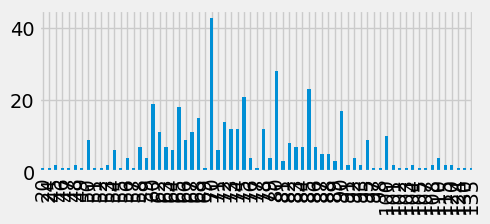

In [108]:
weight_freq.plot.bar()
plt.show()

Questo grafico è carino ma non bello. `pandas` posiziona le barre una accanto all'altra non sul grafico delle ascisse.<br>Cerco di visualizzare solo alcuni valori.

KeyError: 21

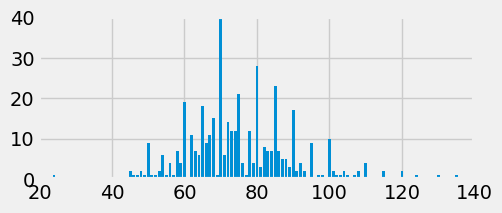

In [161]:
plt.bar(weight_freq.index, weight_freq.values)
plt.xlim((140))
plt.ylim(0, 40)
plt.show()